In [233]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# do not display the number with scientific notation
pd.options.display.float_format = '{:.2f}'.format

pd.set_option('display.max_rows', 1000)
pd.set_option("display.max_colwidth", 100)

In [234]:

path = 'data/clean/'
sales = pd.read_csv(path + 'sales_info_clean.csv',parse_dates= ['date'])

In [266]:
sales.head(1)

,id,order_id,product_quantity,sku,sale_price,date,name,desc,price,promo_price,discount,discount_pc,sales_discount,sales_discount_pc,brand,total_paid,state,category
0,1119109,299539,1,OTT0133,18.99,2017-01-01 00:07:19,Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 Black,resistant cover and thin beveled edges for iPhone SE / 5s / 5,34.99,19.99,15.00,42.87,16.00,45.73,Otterbox,18.99,Shopping Basket,iphone


## Top 10 category

In [275]:
(
sales
    .query('state == "Completed"')
    .groupby('category')
    .agg(total_sum = ('total_paid','sum'))
    .sort_values(by='total_sum', ascending=False)
    .head(10)
    .reset_index()
)

,category,total_sum
0,macbook,5897004.23
1,iphone,4959628.42
2,RAM,3876158.34
3,memory,2375936.25
4,cable,1435161.56
5,display,770803.28
6,case,706817.65
7,NAS,660442.23
8,tablet,631502.71
9,stylus,533110.94


## Company revenue by year and month

In [236]:
p_df = (
sales
    .query('state == "Completed"')
    # create two new columns in our dataframe; year and month
    .assign(year = sales['date'].dt.strftime('%Y'), 
           month = sales['date'].dt.strftime('%b'))
    # get the total paid by each year and month
    .groupby(['year','month'])
    .agg({'total_paid':'sum'})
    .reset_index()
    .sort_values(by=['total_paid'], ascending=False)
     #reset the index to user the column vector in our plot
  
    
)

p_df

,year,month,total_paid
9,2017,Nov,4815256.71
13,2018,Jan,3034628.42
2,2017,Dec,2815128.78
4,2017,Jan,1814077.39
5,2017,Jul,1742753.02
10,2017,Oct,1692699.54
12,2018,Feb,1661856.84
11,2017,Sep,1341251.40
1,2017,Aug,1123921.47
6,2017,Jun,1090259.27


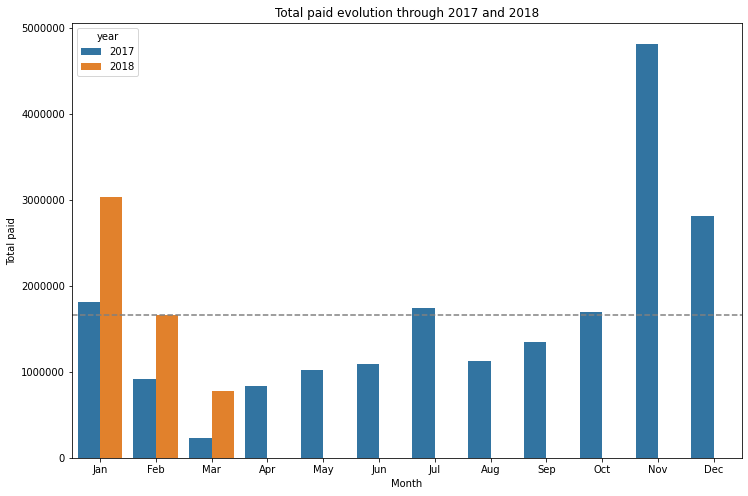

In [237]:
# Create a list with the months sorted from January to December
# It is going to help us sort our columns appropriately
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# define de size of the plot: 12 with be the width, and 8 the height
plt.subplots(figsize=(12, 8))


p = sns.barplot(
    data=p_df, # dataframe we will use to look for the columns information
    x='month', # x values on our chart
    y='total_paid', # y values on our chart
    hue='year', # group color in our chart
    order=months # order x columns
)
# add a horizontal reference line into the chart to know where the mean value will be
p.axhline(
    p_df['total_paid'].mean(), # value where you want to add your reference line
    linestyle='--', # type of line you would like to see on the plot. You can find more informaiton on its documentation
    color='gray'
)

plt.xlabel('Month') # x label name
plt.ylabel('Total paid') # y label name
plt.title('Total paid evolution through 2017 and 2018') # title
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis
plt.show() # show the plot

## Average sales Discount per year-month

In [238]:

p_df = (
sales
    .assign(
        # we can create periods of time, in that case year and mont periods. 
        # I recommend you look more in deep and the documentaion of `to_period`
        year_month = sales['date'].dt.to_period(freq='M')
    )
    # group by year and month period to find the mean and median value
    .groupby('year_month')
    .agg({'discount_pc':'mean','discount':'mean','sales_discount_pc':'mean'})
    .reset_index()
    
)
p_df

,year_month,discount_pc,discount,sales_discount_pc
0,2017-01,22.20,43.28,16.80
1,2017-02,19.10,43.59,10.93
2,2017-03,17.86,50.44,4.65
3,2017-04,18.87,50.41,12.88
4,2017-05,19.09,56.65,11.90
5,2017-06,18.22,61.49,10.17
6,2017-07,19.39,50.42,17.38
7,2017-08,18.89,45.77,14.53
8,2017-09,18.34,57.07,15.21
9,2017-10,18.37,56.96,15.99


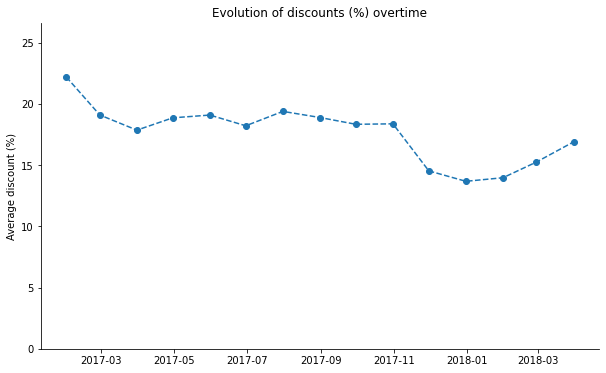

In [239]:
plt.subplots(figsize=(10, 6))

plt.plot_date(data=p_df, x='year_month', y='discount_pc', linestyle='--')
plt.title('Evolution of discounts (%) overtime')
plt.ylabel('Average discount (%)')
plt.ylim(0, p_df['discount_pc'].max()*1.2)
sns.despine()
plt.show()

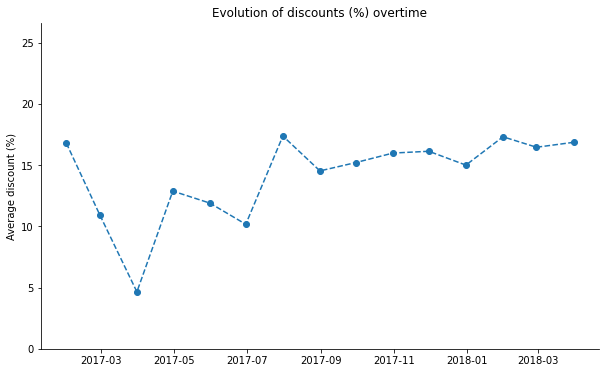

In [264]:
plt.subplots(figsize=(10, 6))

plt.plot_date(data=p_df, x='year_month', y='sales_discount_pc', linestyle='--')
plt.title('Evolution of discounts (%) overtime')
plt.ylabel('Average discount (%)')
plt.ylim(0, p_df['discount_pc'].max()*1.2)
sns.despine()
plt.show()

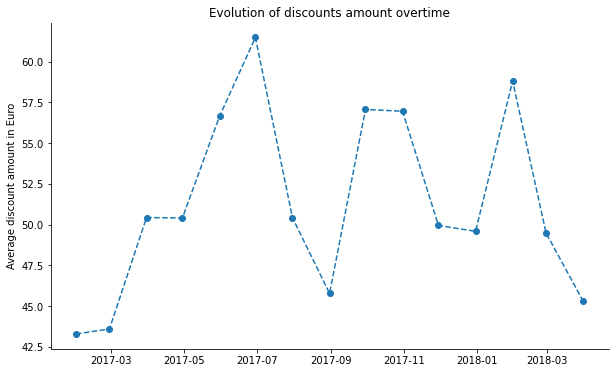

In [265]:
plt.subplots(figsize=(10, 6))

plt.plot_date(data=p_df, x='year_month', y='discount', linestyle='--')
plt.title('Evolution of discounts amount overtime')
plt.ylabel('Average discount amount in Euro')
#plt.ylim(0, p_df['discount_pc'].max()*1.2)
sns.despine()
plt.show()

In [249]:
sales['price']

144256947.38000003

In [251]:
129.25 / 144.26

0.895951753777901

In [253]:
sales['total_paid'].sum()

433046024.37

In [ ]:
433 mill

In [257]:
sales['discount'].sum()

14993481.55

In [259]:
14993481.55 / 433046024.37 *100


3.462329800120594

In [254]:
sales.describe() #discount 

,id,order_id,product_quantity,sale_price,price,promo_price,discount,discount_pc,sales_discount,sales_discount_pc,total_paid
count,291914.00,291914.00,291914.00,291914.00,291914.00,291914.00,291914.00,291914.00,291914.00,291914.00,291914.00
mean,1398786.63,420428.46,1.12,411.33,494.18,442.81,51.36,16.74,82.85,14.95,1483.47
std,152852.54,66207.97,3.41,838.96,1066.09,997.00,125.13,16.72,660.52,176.11,9734.74
min,1119109.00,241319.00,1.00,-119.00,0.83,0.16,0.00,0.00,-159810.83,-89279.79,0.00
25%,1263679.25,362918.25,1.00,35.99,49.90,36.99,5.00,5.08,5.00,5.74,66.49
50%,1408202.00,426625.00,1.00,92.99,109.00,94.99,15.00,12.05,16.00,13.22,274.39
75%,1532158.75,479027.50,1.00,341.95,399.00,339.95,39.96,22.80,41.52,23.34,1279.00
max,1650203.00,527401.00,999.00,159989.83,15339.00,14419.00,2485.49,89.98,11588.68,200.00,214747.53


In [256]:
sales['price'].sum()

144256947.38000003